# Assignment 7
### senlyu

### Q1 : 
The whole task is divided into 4 sub-task, Each sub-task has a different distribution of finishing time.

In [7]:
# sub-task 1 is a random uniform distribution between 5 and 9
# get 1 case in uniform dsitribution is runif(1,min = 5,max = 9)
st1 = function()
{
  return(runif(1,min = 5,max = 9))
}

# sub-task 2 is a random exponential distribution with a rate of 0.1
# get 1 case in exponential distribution is rexp(1,rate=0.1)
st2 = function()
{
  return(rexp(1,rate = 0.1))
}

# sub-task 3 is a Poisson distribution with a lambda of 4
# get 1 case in exponential distribution is rpois(1,lambda = 4)
st3 = function()
{
  return(rpois(1,lambda = 4))
}

# sub-task 4 is a uniform distribution between 3 and 10
# get 1 case in uniform distribution is runif(1,min = 3,max = 10)
st4 = function()
{
  return(runif(1,min = 3,max = 10))
}

# task is get the max value of the first 3 subtasks and add the last subtask
t = function()
{
  return(max(st1(),st2(),st3()) + st4())
}

# replicate 100000 times to get a sample of the results
stat = replicate(100000,t())


### answer for Q1 a. :
get the sample mean and median to estimate the mean and median for the population

In [8]:
mean(stat)
median(stat)

[1] 18.54729

[1] 15.82829

### answer for Q1 b.:
get the the pobability of time < 15 in the sample to estimate the pobability of the population

[1] 0.42025

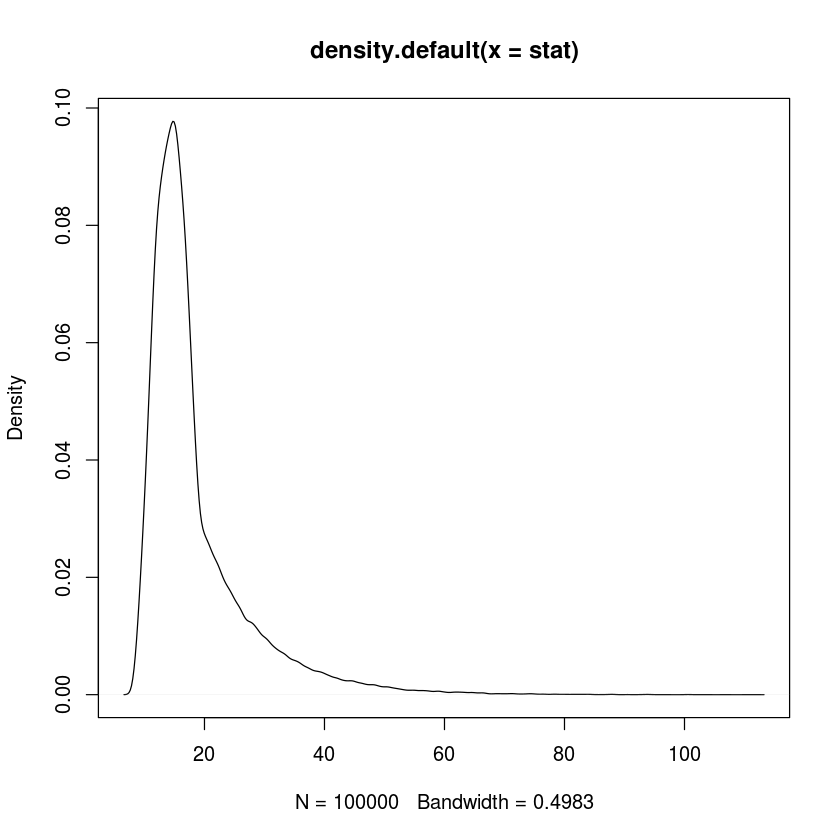

In [9]:
length(stat[stat<15])/length(stat)
# plot the density
plot(density(stat))

## Load the data

In [10]:
diabetes = read.csv("diabetes.csv")

## Q2 :
the hypothesis is that it is a poisson distribution whose mean is 3.7
a possion distribution of mean 3.7 also shows that the lambda is 3.7

[1] 0.03672

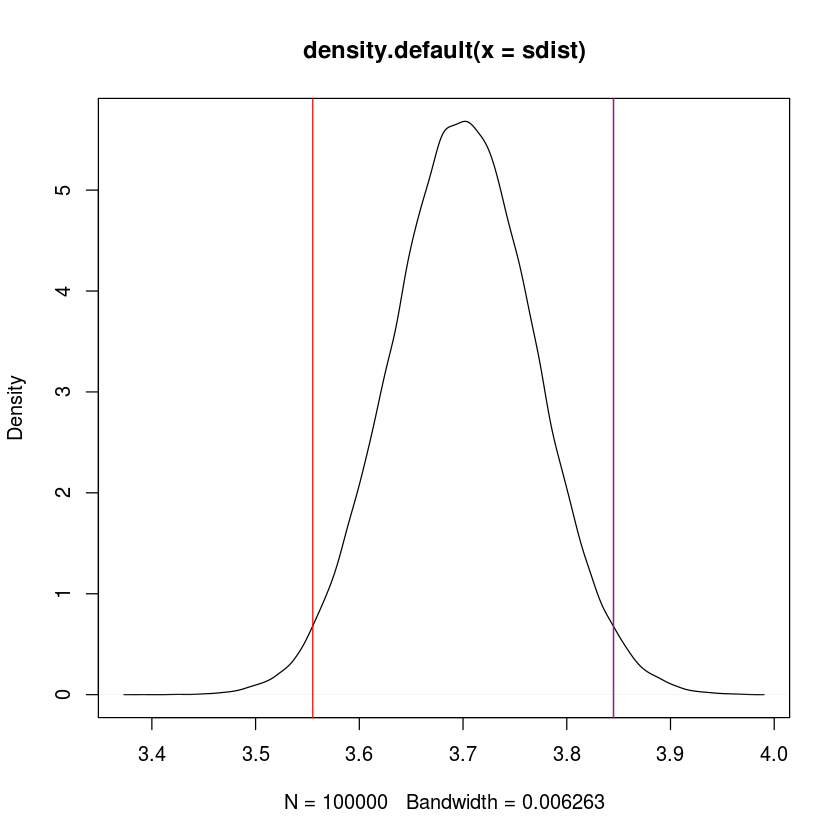

In [11]:
tstat = mean(diabetes$Pregnancies)
# so the f1 will calculate 1 mean
f1 = function()
{
  x = rpois(length(diabetes$Pregnancies),lambda = 3.7)
  return(mean(x))
}
# and we get the distribution of the mean
sdist = replicate(100000,f1())

plot(density(sdist))
abline(v=tstat,col="blue")
gap = abs(mean(sdist)-tstat)
abline(v=mean(sdist)-gap,col="red")
abline(v=mean(sdist)+gap,col="red")
s1 = sdist[sdist<mean(sdist)-gap|sdist>mean(sdist)+gap]
# pvalue shows that the possiblity that hypothesis or even worse cases happens
pvalue = length(s1)/length(sdist)
pvalue

### answer for Q1 b.:
pvalue is less than 0.05 so reject the hypothesis.
the variable is not follows a poisson distribution of lambda is 3.7

## Q3
use both parametric test and nonparametric test to test the median is 80

### test statistics is

In [12]:
tstat = median(diabetes$Insulin)

### parametric test of median 80
we assume it follows a normal distribution

[1] 0

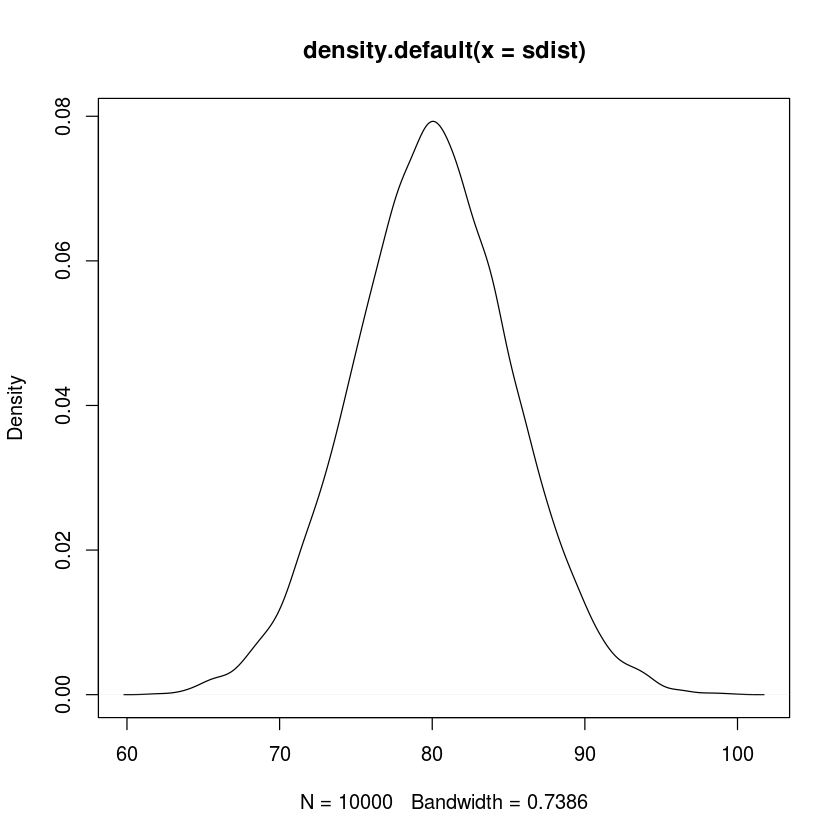

In [13]:
f1 = function()
{
  x = rnorm(length(diabetes$Insulin),mean = 80,sd = sd(diabetes$Insulin))
  return(median(x))
}
sdist = replicate(10000,f1())
plot(density(sdist))
abline(v=tstat,col="blue")
gap = abs(mean(sdist)-tstat)
abline(v=mean(sdist)-gap,col="red")
abline(v=mean(sdist)+gap,col="red")
s1 = sdist[sdist<mean(sdist)-gap|sdist>mean(sdist)+gap]
pvalue = length(s1)/length(sdist)
pvalue

### answer for parametrics
pvalue is very low shows that the hypothesis is rejected. the median is not 80

### non-parametric test of median 80
because test the median, so the half is bigger than the median the other is small than the median. so the population is half bigger than the median(1), half is smaller than median(0)

about whether we should use sign test or ranked sign test:

1. from the paper below, I see that they both have the same hypothesis
but ranked sign test takes the magnitude of the observation into account
http://iosrjournals.org/iosr-jm/papers/Vol10-issue1/Version-4/A010140106.pdf

2. from wikioedia sign test:
the sign test is most useful if comparisons can only be expressed as x > y, x = y, or x < y. If, instead, the observations can be expressed as numeric quantities (x = 7, y = 18), or as ranks (rank of x = 1st, rank of y = 8th), then the paired t-test[1] or the Wilcoxon signed-rank test[2] will usually have greater power than the sign test to detect consistent differences.
https://en.wikipedia.org/wiki/Sign_test

so here I think both test will have the same effort in this question. so I use the sample one, sign test here.

[1] 0

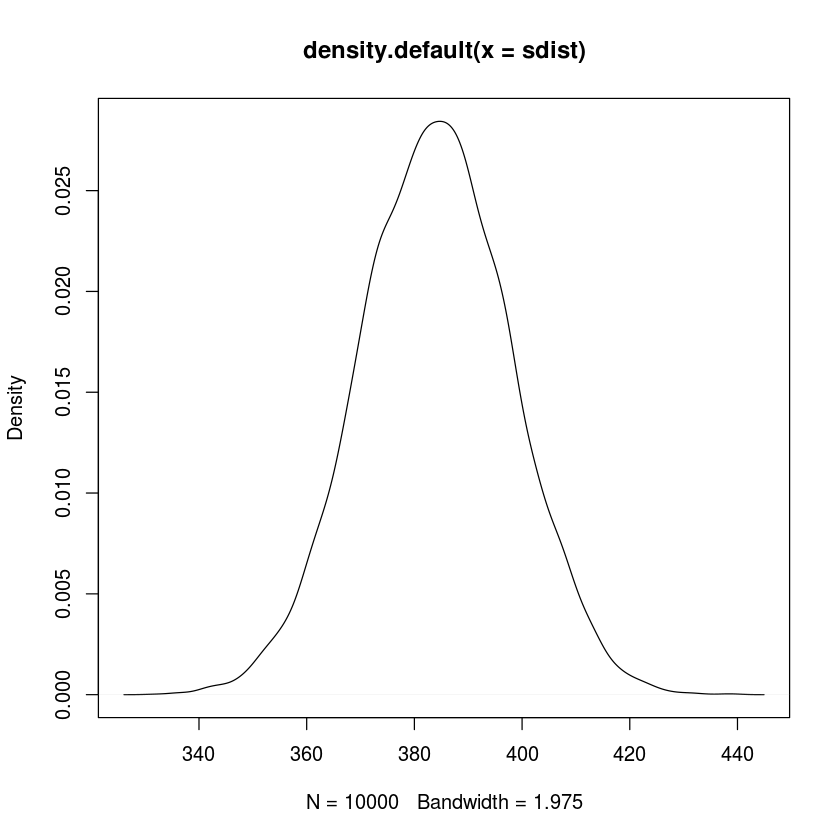

In [17]:
tstat = sum(ifelse(diabetes$Insulin>80,1,0))
f1 = function()
{
  v = c(1,0)
  p = c(0.5,0.5)
  x = sample(x = v, replace = T, prob = p, size = length(diabetes$Insulin))
  return(sum(x))
}
# the rest are all the same to calculate the pvalue
sdist = replicate(10000,f1())
plot(density(sdist))
abline(v=tstat,col="blue")
gap = abs(mean(sdist)-tstat)
abline(v=mean(sdist)-gap,col="red")
abline(v=mean(sdist)+gap,col="red")
s1 = sdist[sdist<mean(sdist)-gap|sdist>mean(sdist)+gap]
pvalue = length(s1)/length(sdist)
pvalue

### answer for nonparametrics
pvalue is very low shows that the hypothesis is rejected
the median is not 80

### answer for Q3
the two test shows the same result that the variable doesnt have a median of 80.

## Q4
we need to conduct a two sample test that the standard deviation of BMI is the same for both Outsome values. so we need sample some data from BMI and set the rest to be the other sample. since two sample form common population, they should have the same standard deviation. and also this is nonparametric test

[1] 0.54745

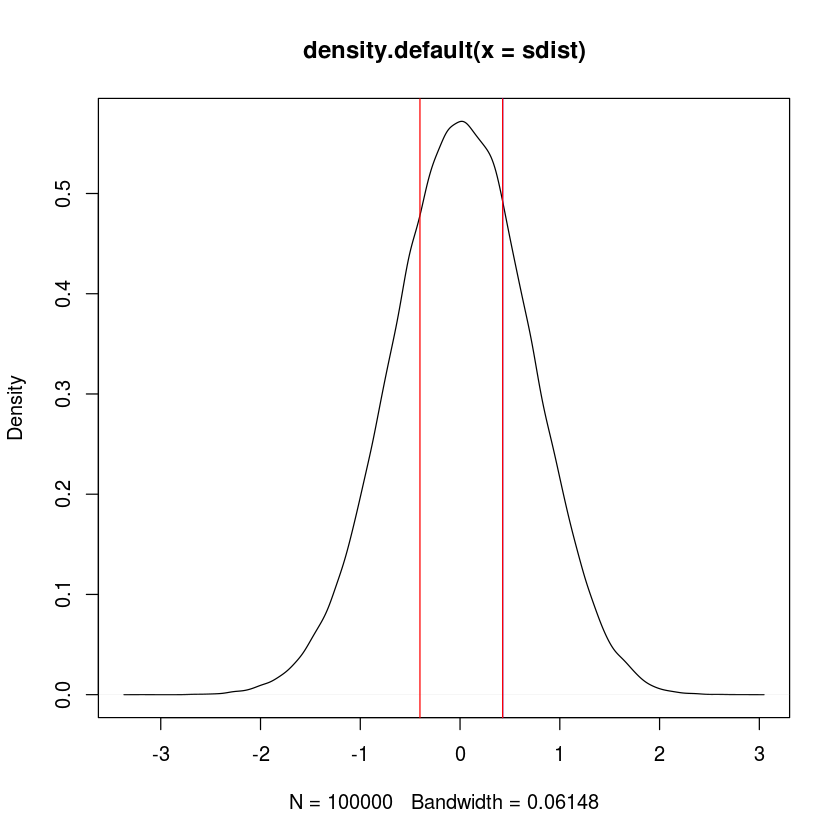

In [20]:
BMI = diabetes$BMI
Outcome = diabetes$Outcome
numof1 = sum(Outcome)
# calculate the both sd
sd1 = sd(diabetes$BMI[diabetes$Outcome==0])
sd2 = sd(diabetes$BMI[diabetes$Outcome==1])
# the test statistic is the difference of two standard deviation
tstat = sd1 -sd2
# sample(v1,length(v1),replace=FALSE) will get a vector with same value but different sequences.
# first length(BMI)-numof1 and the rest will be two samples
f1 = function()
{
  x = sample(BMI,length(BMI),replace = FALSE)
  x1 = x[1:(length(BMI)-numof1)]
  x2 = x[(length(BMI)-numof1):length(BMI)]
  sd1 = sd(x1)
  sd2 = sd(x2)
  return(sd1-sd2)
}
sdist = replicate(100000,f1())
plot(density(sdist))
abline(v=tstat,col="blue")
gap = abs(mean(sdist)-tstat)
abline(v=mean(sdist)-gap,col="red")
abline(v=mean(sdist)+gap,col="red")
s1 = sdist[sdist<mean(sdist)-gap|sdist>mean(sdist)+gap]
pvalue = length(s1)/length(sdist)
pvalue

### answer for Q4
the pvalue is bigger than 0.5, so the hypothesis cannot be rejected. so the the standard deviation of BMI is the same for both Outsome values.

## Q5
we need to test whether the two variable have the same shapes

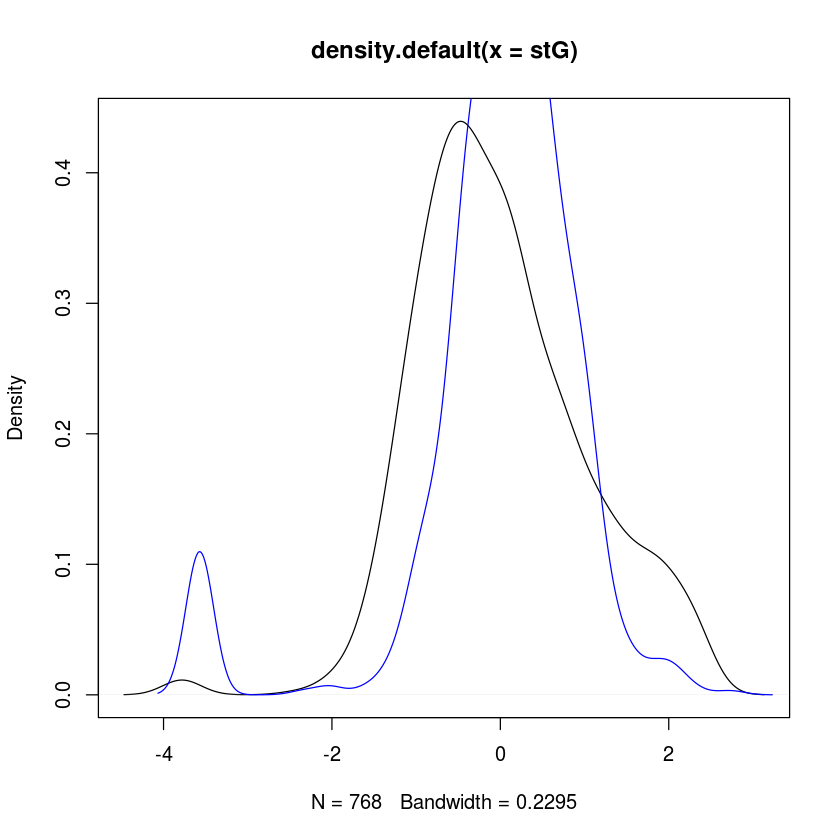

In [22]:
Glucose = diabetes$Glucose
BloodPressure = diabetes$BloodPressure
# I do normalize of these two varibales
stG = (Glucose - mean(Glucose))/sd(Glucose)
stB = (BloodPressure - mean(BloodPressure))/sd(BloodPressure)
# I will view these two variables
plot(density(stG))
lines(density(stB),col="blue")

[1] 2.404358

[1] 0

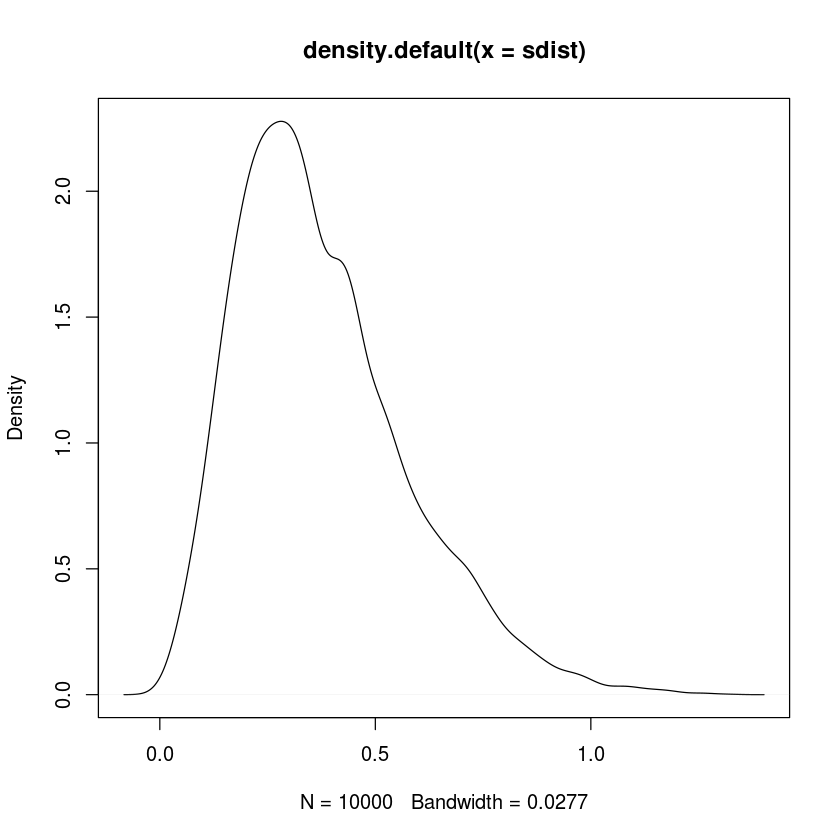

In [23]:
# set some probabilities to use
p = c(0.1,0.2,0.9,0.9,0.96)
q1 = quantile(stG,probs = p)
q2 = quantile(stB,probs = p)
# so use the sum of absolute difference of all these quantiles as test statistics
tstat = sum(abs(q1-q2))
tstat
# the two sample should come from the same population
f1 = function()
{
  x1 = sample(stG,length(stG),replace = TRUE)
  x2 = sample(stG,length(stG),replace = TRUE)
  q1 = quantile(x1,probs = p)
  q2 = quantile(x2,probs = p)
  return(sum(abs(q1-q2)))
}
sdist = replicate(10000,f1())
plot(density(sdist))
abline(v=tstat,col="blue")
gap = abs(mean(sdist)-tstat)
abline(v=mean(sdist)-gap,col="red")
abline(v=mean(sdist)+gap,col="red")
s1 = sdist[sdist<mean(sdist)-gap|sdist>mean(sdist)+gap]
pvalue = length(s1)/length(sdist)
pvalue

### answer for Q5
the pvalue is very low
so that the we could say that they dont have the same shapes.